In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# data importing

In [2]:
credits=pd.read_csv(r"C:\HBO-MAX-DATA\credits.csv\credits.csv")
titles=pd.read_csv(r"C:\HBO-MAX-DATA\titles.csv\titles.csv")

In [3]:
credits.head()

,person_id,id,name,character,role
0,60017,tm155702,Judy Garland,Dorothy Gale,ACTOR
1,53496,tm155702,Ray Bolger,Hunk / Scarecrow,ACTOR
2,79549,tm155702,Jack Haley,Hickory / Tin Man,ACTOR
3,79548,tm155702,Bert Lahr,Zeke / Cowardly Lion,ACTOR
4,60995,tm155702,Margaret Hamilton,Elmira Gulch / Wicked Witch of the West,ACTOR


In [4]:
credits.shape

(66393, 5)

In [5]:
credits.drop_duplicates(inplace=True)
credits.shape

(66393, 5)

In [6]:
credits.isnull().sum()

person_id       0
id              0
name            0
character    4505
role            0
dtype: int64

In [7]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8


In [8]:
titles.shape

(3294, 15)

In [9]:
titles.drop_duplicates(inplace=True)
titles.shape

(3294, 15)

In [10]:
pd.DataFrame(titles.count(),columns=['total'])

,total
id,3294
title,3294
type,3294
description,3282
release_year,3294
age_certification,2086
runtime,3294
genres,3294
production_countries,3294
seasons,756


In [11]:
len(titles['title'].unique())

3263

In [12]:
pd.DataFrame(titles['title'].value_counts())

,title
Shadows,3
Wonder Woman,3
Original Sin,2
Head of the Class,2
The Powerpuff Girls,2
...,...
The Boondocks,1
Cold Case,1
Frailty,1
Entourage,1


In [13]:
len(titles['id'].unique())

3294

In [14]:
pd.DataFrame(credits.count(),columns=['total'])

,total
person_id,66393
id,66393
name,66393
character,61888
role,66393


In [15]:
len(credits['id'].unique())

3120

In [16]:
len(credits['person_id'].unique())

44872

In [17]:
titles.isnull().sum()

id                         0
title                      0
type                       0
description               12
release_year               0
age_certification       1208
runtime                    0
genres                     0
production_countries       0
seasons                 2538
imdb_id                  326
imdb_score               372
imdb_votes               383
tmdb_popularity           33
tmdb_score               268
dtype: int64

In [18]:
titles['description'].fillna(' ',inplace=True)
titles.isnull().sum()

id                         0
title                      0
type                       0
description                0
release_year               0
age_certification       1208
runtime                    0
genres                     0
production_countries       0
seasons                 2538
imdb_id                  326
imdb_score               372
imdb_votes               383
tmdb_popularity           33
tmdb_score               268
dtype: int64

In [19]:
type(titles['genres'][0])

str

In [20]:
titles['description'][3200]

'In the late ‘90s, “Sex and the City” took television by storm with its honest and hilarious perspective on love, relationships… and sex, earning legions of devoted fans. Over 20 years later, this exclusive and immersive documentary offers a unique behind-the-scenes look at the filming of the new chapter, “And Just Like That…”.'

# EDA(titles)

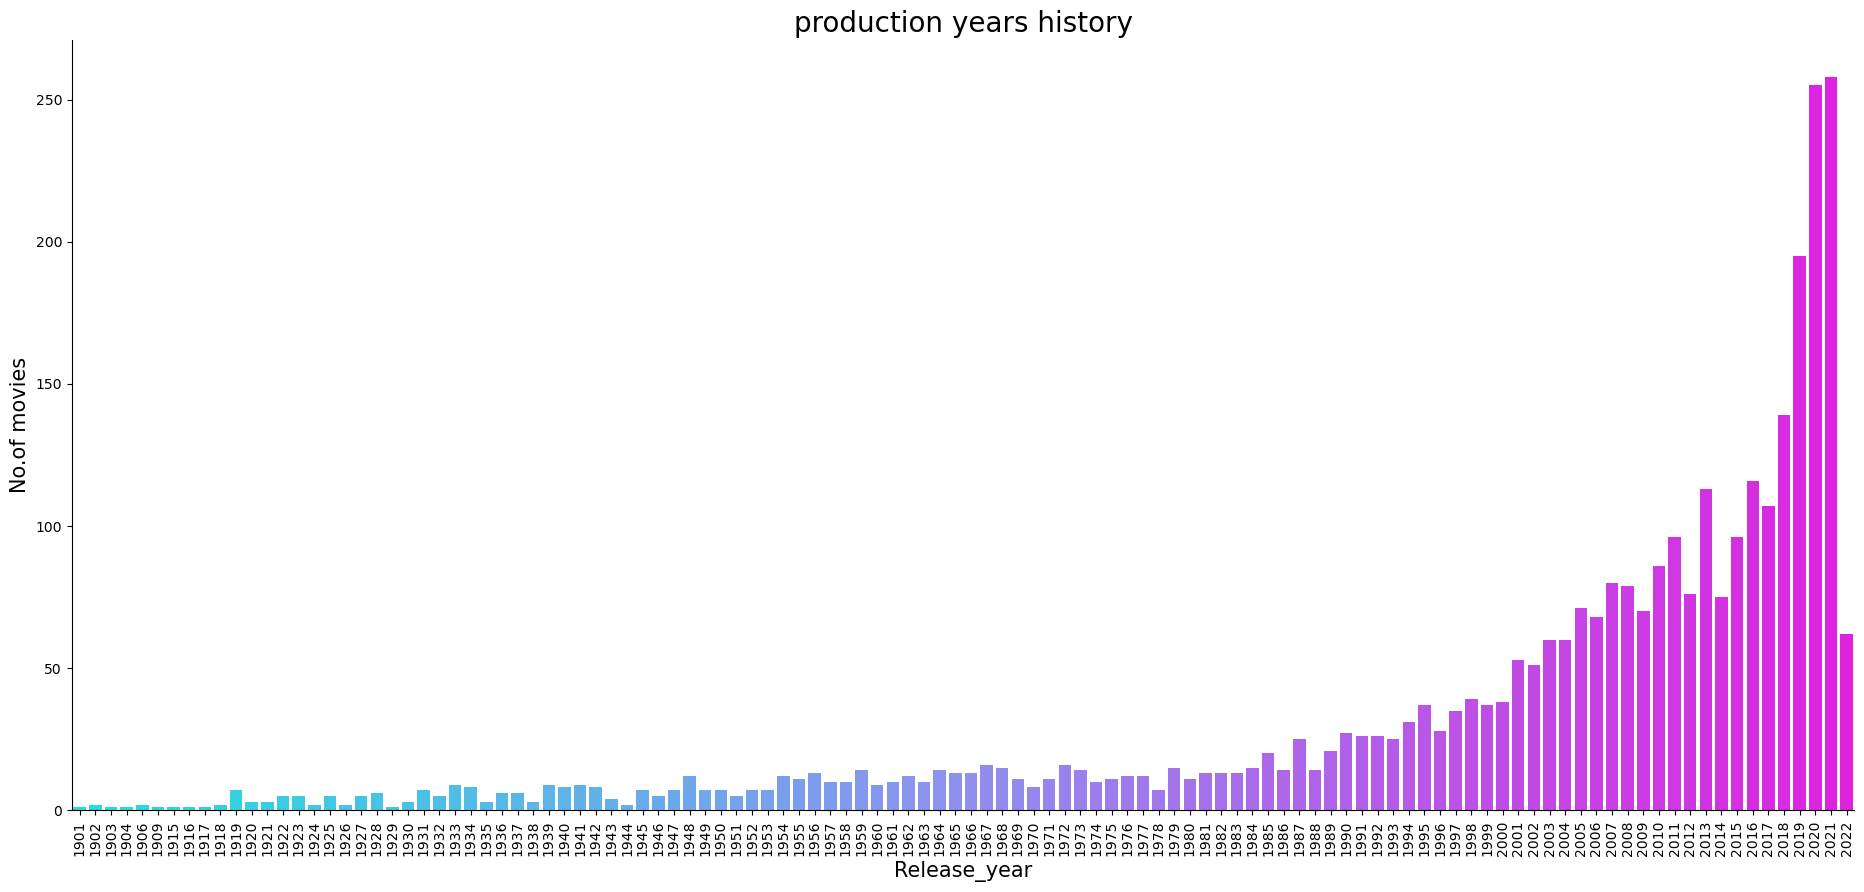

In [21]:
plt.figure(figsize=(23,10))
release_year=pd.DataFrame(titles['release_year'].value_counts())
sns.barplot(x=release_year.index,y=release_year['release_year'],data=release_year,palette='cool')
plt.title('production years history',fontsize=20)
plt.ylabel('No.of movies',fontsize=15)
plt.xlabel('Release_year',fontsize=15)
plt.xticks(rotation=90)
sns.despine()
plt.show()

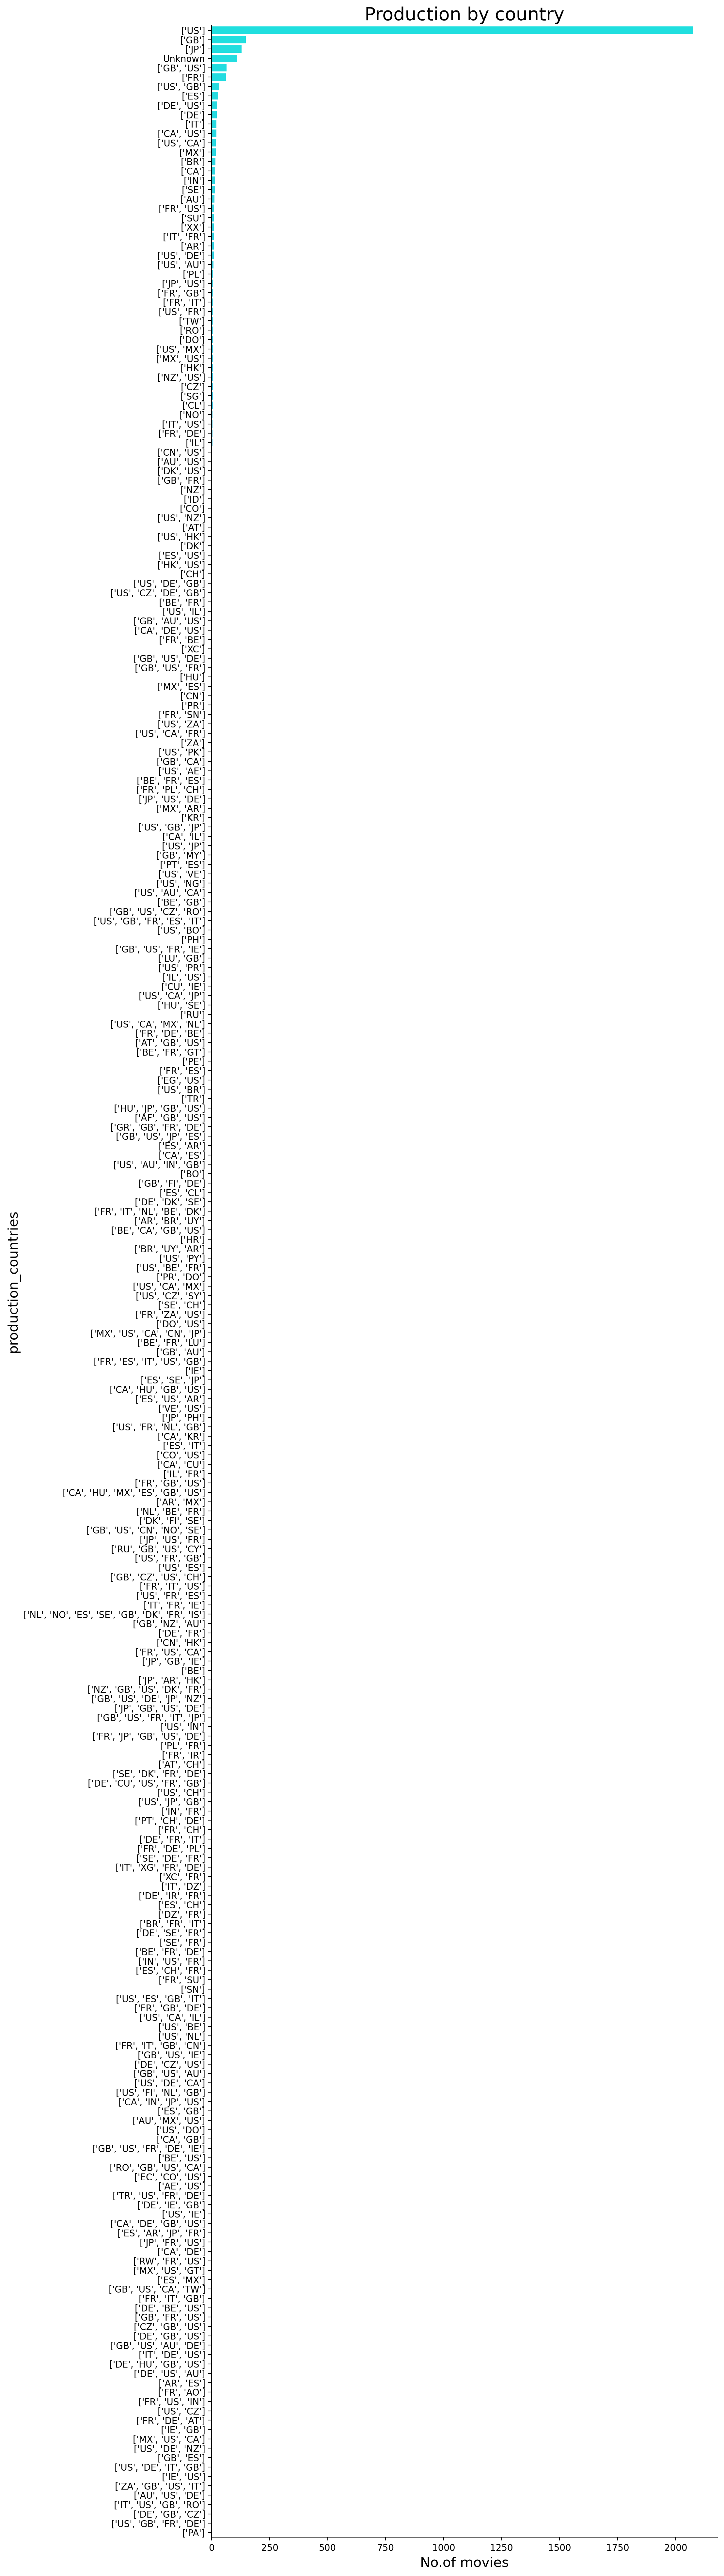

In [22]:
plt.figure(figsize=(10,50),dpi=200)
production_countries=pd.DataFrame(titles['production_countries'].replace('[]', 'Unknown').value_counts())
sns.barplot(y=production_countries.index,x=production_countries['production_countries'],data=production_countries,palette='cool')
plt.title('Production by country',fontsize=20)
plt.ylabel('production_countries',fontsize=15)
plt.xlabel('No.of movies',fontsize=15)
sns.despine()
plt.show()

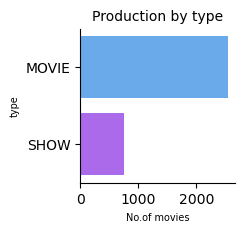

In [23]:
plt.figure(figsize=(2,2))
type=pd.DataFrame(titles['type'].value_counts())
sns.barplot(y=type.index,x=type['type'],data=type,palette='cool')
plt.title('Production by type',fontsize=10)
plt.ylabel('type',fontsize=7)
plt.xlabel('No.of movies',fontsize=7)
sns.despine()
plt.show()

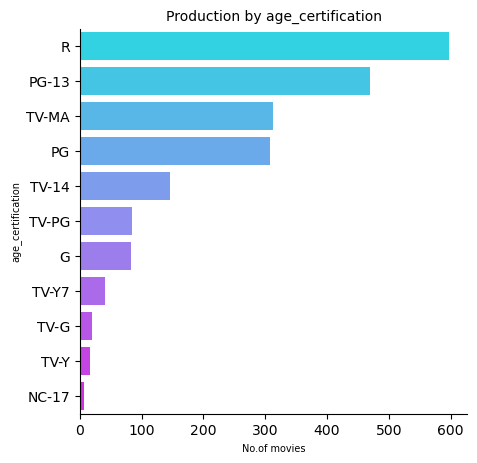

In [24]:
plt.figure(figsize=(5,5))
age_certification=pd.DataFrame(titles['age_certification'].value_counts())
sns.barplot(y=age_certification.index,x=age_certification['age_certification'],data=age_certification,palette='cool')
plt.title('Production by age_certification',fontsize=10)
plt.ylabel('age_certification',fontsize=7)
plt.xlabel('No.of movies',fontsize=7)
sns.despine()
plt.show()

In [25]:
def get_random_color():
    r1 = lambda: random.randint(0,255)
    return '#%02X%02X%02X' % (r1(),r1(),r1())

def get_histplot_central_tendency(df: dict, fields: list):
    for field in fields:
        f, (ax1) = plt.subplots(1,1,figsize=(6, 6))
        v_dist_1 = df[field].values
        sns.histplot(v_dist_1, ax=ax1, color=get_random_color(), kde=True)

        mean=df[field].mean()
        median=df[field].median()
        mode=df[field].mode().values[0]

        ax1.axvline(mean, color='r', linestyle='--', label="Mean")
        ax1.axvline(median, color='g', linestyle='-', label="Mean")
        ax1.axvline(mode, color='b', linestyle='-', label="Mode")
        ax1.legend()
        #plt.grid()
        plt.plot(color="white", lw=3)
        plt.suptitle(f"{field} - Histogram analysis", fontsize=18)

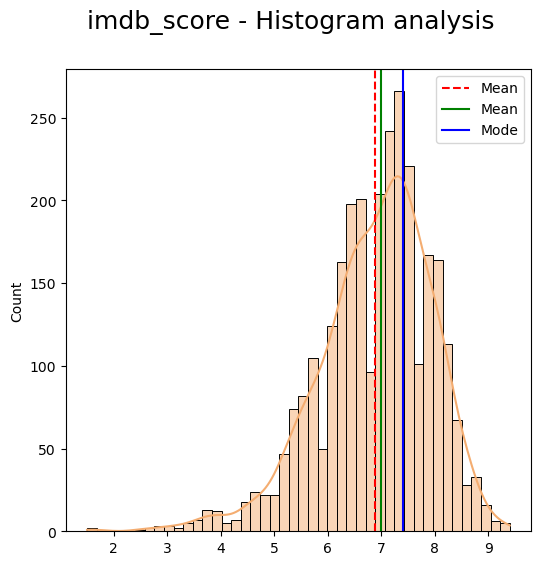

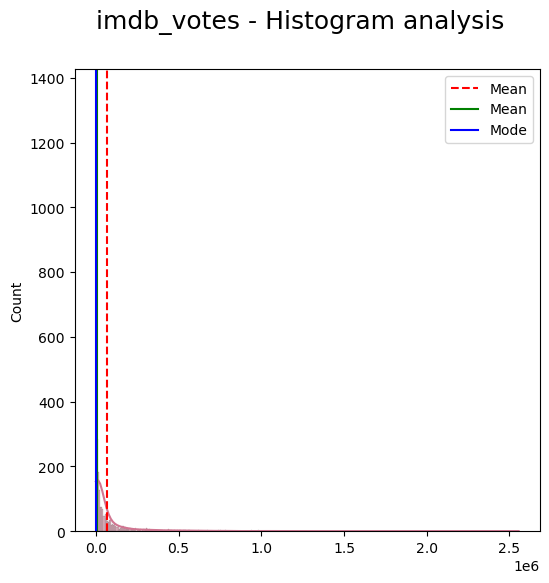

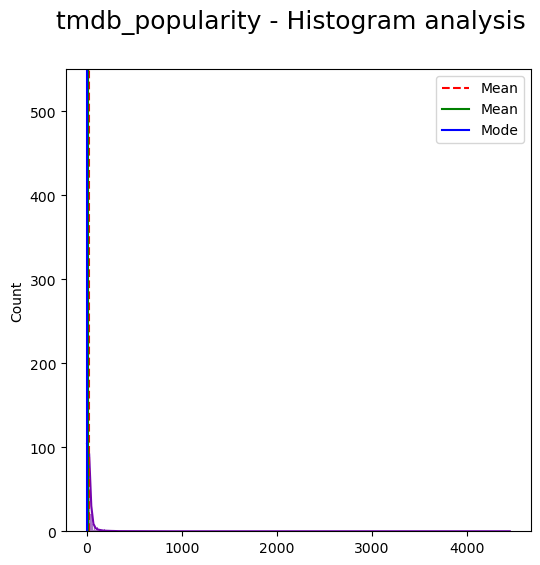

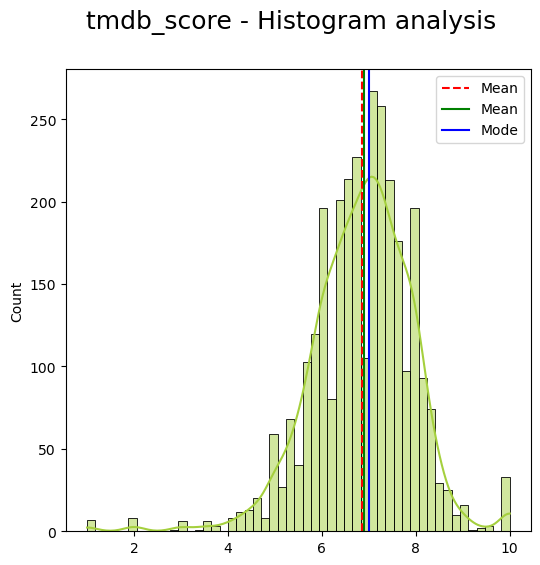

In [26]:
get_histplot_central_tendency(titles, ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'])

# data cleaning

In [27]:
import re 

In [28]:
def cleaning(text):
    text=re.sub('[^a-zA-Z0-9]',' ',text) #remove other than aplhabet,num
    text=re.sub('\s+',' ',text) #removing extra whitespaces
    text=text.lower()
    return text.strip()

In [29]:
cleaning(titles['description'][3200])

'in the late 90s sex and the city took television by storm with its honest and hilarious perspective on love relationships and sex earning legions of devoted fans over 20 years later this exclusive and immersive documentary offers a unique behind the scenes look at the filming of the new chapter and just like that'

In [30]:
titles['description']=titles['description'].apply(lambda x: cleaning(x))
titles['description'].head()

0    young dorothy finds herself in a magical world...
1    newspaper magnate charles foster kane is taken...
2    in casablanca morocco in december 1941 a cynic...
3    private investigator philip marlowe is hired b...
4    a private detective takes on a case that invol...
Name: description, dtype: object

In [31]:
import spacy
nlp=spacy.load("en_core_web_sm")

In [32]:
def lemmatization(text):
    doc=nlp(text)
    y=' '
    for token in doc:
        x=token.lemma_
        y=y+' '+x
    return y.strip()

In [33]:
lemmatization(titles['description'][3200])

'in the late 90 sex and the city take television by storm with its honest and hilarious perspective on love relationship and sex earn legion of devoted fan over 20 year later this exclusive and immersive documentary offer a unique behind the scene look at the filming of the new chapter and just like that'

In [34]:
titles['description'][3200]

'in the late 90s sex and the city took television by storm with its honest and hilarious perspective on love relationships and sex earning legions of devoted fans over 20 years later this exclusive and immersive documentary offers a unique behind the scenes look at the filming of the new chapter and just like that'

In [35]:
from spacy.lang.en.stop_words import STOP_WORDS
len(STOP_WORDS)

326

In [36]:
def stop_words(text):
    doc=nlp(text)
    y=' '
    for token in doc:
        if not token.is_stop:
            x=token.text
            y=y+' '+x
    return y.strip()

In [37]:
stop_words(titles['description'][3200])

'late 90s sex city took television storm honest hilarious perspective love relationships sex earning legions devoted fans 20 years later exclusive immersive documentary offers unique scenes look filming new chapter like'

In [38]:
titles['description']=titles['description'].apply(lambda x: lemmatization(x))
titles['description']=titles['description'].apply(lambda x: stop_words(x))

In [39]:
titles['description'][3200]

'late 90 sex city television storm honest hilarious perspective love relationship sex earn legion devoted fan 20 year later exclusive immersive documentary offer unique scene look filming new chapter like'

In [40]:
titles['genres']=titles['genres'].apply(lambda x: cleaning(x))

In [41]:
titles['genres'].head()

0            fantasy family
1                     drama
2         drama romance war
3            thriller crime
4    thriller romance crime
Name: genres, dtype: object

In [42]:
titles['tags']=titles['description']+' '+titles['genres']

In [43]:
titles['genres'][3200]

'documentation'

In [44]:
len(titles['tags'][3200].split())

31

In [45]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,tags
0,tm155702,The Wizard of Oz,MOVIE,young dorothy find magical world friend lion s...,1939,G,102,fantasy family,['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6,young dorothy find magical world friend lion s...
1,tm83648,Citizen Kane,MOVIE,newspaper magnate charles foster kane mother b...,1941,PG,119,drama,['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0,newspaper magnate charles foster kane mother b...
2,tm77588,Casablanca,MOVIE,casablanca morocco december 1941 cynical ameri...,1942,PG,102,drama romance war,['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2,casablanca morocco december 1941 cynical ameri...
3,tm82363,The Big Sleep,MOVIE,private investigator philip marlowe hire wealt...,1946,NaN,116,thriller crime,['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7,private investigator philip marlowe hire wealt...
4,tm84701,The Maltese Falcon,MOVIE,private detective case involve eccentric crimi...,1941,NaN,100,thriller romance crime,['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8,private detective case involve eccentric crimi...


# vectorization

# bow

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=500)

In [47]:
requried_text=titles['tags']

In [48]:
x_bow=cv.fit_transform(requried_text).toarray()

In [49]:
x_bow[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# tf-idf

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf=TfidfVectorizer(
    sublinear_tf=True,
    max_features=500
)

In [52]:
x_tf=tfidf.fit_transform(requried_text).toarray()

In [53]:
x_tf.shape

(3294, 500)

# content filtering

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

In [55]:
similarity1=cosine_similarity(x_bow)

In [56]:
similarity1.shape

(3294, 3294)

In [57]:
sorted(list(enumerate(similarity1[5])),reverse=True,key=lambda x:x[1])[1:11]

[(336, 0.5636018619766344),
 (1543, 0.5504818825631803),
 (41, 0.547722557505166),
 (233, 0.5333333333333332),
 (1435, 0.5333333333333332),
 (2, 0.5270462766947299),
 (86, 0.5163977794943222),
 (60, 0.4898979485566356),
 (75, 0.48304589153964794),
 (1932, 0.48304589153964794)]

In [58]:
similarity2=cosine_similarity(x_tf)

In [59]:
similarity2.shape

(3294, 3294)

In [60]:
sorted(list(enumerate(similarity2[5])),reverse=True,key=lambda x:x[1])[1:10]

[(86, 0.4247720599814495),
 (233, 0.4074707213239203),
 (1757, 0.4000313351600295),
 (41, 0.38866659518248725),
 (1435, 0.3763487768967593),
 (336, 0.3752457793837427),
 (2, 0.35123094321039583),
 (1543, 0.3501650152923922),
 (158, 0.33668450884151335)]

In [61]:
movie_index=titles[titles['title']=='The Wizard of Oz'].index[0]
movie_index

0

In [62]:
(titles.iloc[0]).title

'The Wizard of Oz'

In [63]:
titles['title']=titles['title'].apply(lambda x: cleaning(x))

In [64]:
(titles.iloc[0]).title

'the wizard of oz'

In [65]:
def recommend(movie):
    movie=cleaning(movie)
    movie_index=titles[titles['title']==movie].index[0]
    distances=similarity1[movie_index]
    movie_list=sorted(enumerate(distances),reverse=True,key=lambda x:x[1])[0:11]
    
    for i,j in movie_list:
        if(j>0.30):
            print(titles.iloc[i].title,'->',j) 

In [66]:
recommend('Looney Tunes Cartoons')

looney tunes cartoons -> 1.0
new looney tunes -> 0.649519052838329
tom and jerry -> 0.6164962023950898
harvey birdman attorney at law -> 0.5400617248673217
robot chicken -> 0.4902903378454601
the looney tunes show -> 0.4853626716970756
ok k o let s be heroes -> 0.48507125007266594
lucas the spider -> 0.47434164902525694
jellystone -> 0.47434164902525694
a little curious -> 0.4481290797651359
the sylvester tweety mysteries -> 0.4375


# collebrative filtering

# weighted average

In [67]:
titles['imdb_score'].fillna(0,inplace=True)
titles['tmdb_score'].fillna(0,inplace=True)

In [68]:
titles['rating']=(titles['imdb_score']+titles['tmdb_score'])/2
titles['rating'].head()

0    7.85
1    8.15
2    8.35
3    7.80
4    7.90
Name: rating, dtype: float64

In [69]:
titles['rating'].describe()

count    3294.000000
mean        6.199651
std         1.866789
min         0.000000
25%         5.650000
50%         6.700000
75%         7.450000
max         9.500000
Name: rating, dtype: float64

In [70]:
weight_data=titles.drop(columns=['description','release_year','age_certification','runtime','genres','production_countries','seasons','tags'],axis=1)

In [71]:
weight_data.head()

,id,title,type,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,rating
0,tm155702,the wizard of oz,MOVIE,tt0032138,8.1,389774.0,41.442,7.6,7.85
1,tm83648,citizen kane,MOVIE,tt0033467,8.3,433804.0,14.383,8.0,8.15
2,tm77588,casablanca,MOVIE,tt0034583,8.5,558849.0,20.087,8.2,8.35
3,tm82363,the big sleep,MOVIE,tt0038355,7.9,84494.0,12.911,7.7,7.80
4,tm84701,the maltese falcon,MOVIE,tt0033870,8.0,156603.0,12.788,7.8,7.90


In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler=MinMaxScaler()
movie_scaled=scaler.fit_transform(weight_data[['rating','tmdb_popularity']])
movie_normalized=pd.DataFrame(movie_scaled,columns=['norm_rating','norm_popularity'])
movie_normalized.head()

,norm_rating,norm_popularity
0,0.826316,0.009306
1,0.857895,0.003222
2,0.878947,0.004505
3,0.821053,0.002891
4,0.831579,0.002864


In [74]:
weight_data=pd.concat([weight_data,movie_normalized],axis=1)

In [75]:
weight_data.head()

,id,title,type,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,rating,norm_rating,norm_popularity
0,tm155702,the wizard of oz,MOVIE,tt0032138,8.1,389774.0,41.442,7.6,7.85,0.826316,0.009306
1,tm83648,citizen kane,MOVIE,tt0033467,8.3,433804.0,14.383,8.0,8.15,0.857895,0.003222
2,tm77588,casablanca,MOVIE,tt0034583,8.5,558849.0,20.087,8.2,8.35,0.878947,0.004505
3,tm82363,the big sleep,MOVIE,tt0038355,7.9,84494.0,12.911,7.7,7.80,0.821053,0.002891
4,tm84701,the maltese falcon,MOVIE,tt0033870,8.0,156603.0,12.788,7.8,7.90,0.831579,0.002864


In [76]:
weight_data['score']=weight_data['norm_rating']*0.5+weight_data['norm_popularity']*0.5

In [77]:
weight_data.head()

,id,title,type,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,rating,norm_rating,norm_popularity,score
0,tm155702,the wizard of oz,MOVIE,tt0032138,8.1,389774.0,41.442,7.6,7.85,0.826316,0.009306,0.417811
1,tm83648,citizen kane,MOVIE,tt0033467,8.3,433804.0,14.383,8.0,8.15,0.857895,0.003222,0.430559
2,tm77588,casablanca,MOVIE,tt0034583,8.5,558849.0,20.087,8.2,8.35,0.878947,0.004505,0.441726
3,tm82363,the big sleep,MOVIE,tt0038355,7.9,84494.0,12.911,7.7,7.80,0.821053,0.002891,0.411972
4,tm84701,the maltese falcon,MOVIE,tt0033870,8.0,156603.0,12.788,7.8,7.90,0.831579,0.002864,0.417221


In [78]:
weight_data=weight_data.sort_values(['score'],ascending=False)
weight_data.head(20)

,id,title,type,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,rating,norm_rating,norm_popularity,score
2974,tm244142,the batman,MOVIE,tt1877830,8.0,456054.0,4447.894,7.8,7.90,0.831579,1.000000,0.915789
1706,ts2,game of thrones,SHOW,tt0944947,9.2,1983794.0,492.101,8.4,8.80,0.926316,0.110627,0.518471
2662,tm1082305,euphoria trouble don t last always,MOVIE,tt10636622,9.0,NaN,31.564,10.0,9.50,1.000000,0.007085,0.503543
1878,ts20233,rick and morty,SHOW,tt2861424,9.2,473951.0,238.434,8.8,9.00,0.947368,0.053595,0.500482
3139,tm1082045,euphoria f ck anyone who s not a sea blob,MOVIE,tt13608984,8.8,NaN,1.400,10.0,9.40,0.989474,0.000303,0.494889
2529,ts87074,euphoria,SHOW,tt8772296,8.4,156483.0,445.399,8.4,8.40,0.884211,0.100127,0.492169
984,ts15128,crashbox,SHOW,tt0321777,8.5,341.0,6.175,10.0,9.25,0.973684,0.001377,0.487531
1133,ts22225,regular show,SHOW,tt1710308,8.5,40562.0,282.607,8.8,8.65,0.910526,0.063527,0.487026
2740,ts89481,the world between us,SHOW,tt10073114,9.0,2333.0,4.244,9.4,9.20,0.968421,0.000943,0.484682
2534,ts222852,jujutsu kaisen,SHOW,tt12343534,8.6,48949.0,303.199,8.5,8.55,0.900000,0.068156,0.484078


In [79]:
weight_data[['title','score']].head(20)

,title,score
2974,the batman,0.915789
1706,game of thrones,0.518471
2662,euphoria trouble don t last always,0.503543
1878,rick and morty,0.500482
3139,euphoria f ck anyone who s not a sea blob,0.494889
2529,euphoria,0.492169
984,crashbox,0.487531
1133,regular show,0.487026
2740,the world between us,0.484682
2534,jujutsu kaisen,0.484078


In [80]:
#have to do with correlation